## Notes on SVR

- **Kernel:** maps lower dimensional data into a higher dimension.
    - often used to solve *Nonlinear* problems using *linear* methods
    <img style="width:300px" src="https://cdn-images-1.medium.com/max/1600/1*C1tN-IxPjg6fwAHKkJthEw.png"/>
- sd


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Position_Salaries.csv")

-------

-------

##### reshape practice

In [21]:
arr = np.array(range(6))
arr

array([0, 1, 2, 3, 4, 5])

In [22]:
reshape1 = arr.reshape((3, 2), order='C' )
reshape1

array([[0, 1],
       [2, 3],
       [4, 5]])

In [24]:
reshape2 = reshape1.reshape(6)
reshape2

array([0, 1, 2, 3, 4, 5])

In [27]:
reshape3 = arr.reshape((-1, 1))
reshape3

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [28]:
reshape4 = arr.reshape((2, -1))
reshape4

array([[0, 1, 2],
       [3, 4, 5]])

In [29]:
reshape5 = arr.reshape((3, 2)).reshape(-1, order='C')
reshape5

array([0, 1, 2, 3, 4, 5])

In [31]:
reshape6 = arr.reshape((3, 2)).reshape(-1, order='A')
reshape6

array([0, 1, 2, 3, 4, 5])

In [32]:
arr2 = np.array(list(range(8)))
reshape7 = arr2.reshape((2, 2, 2))
reshape7

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

__________

__________

In [34]:
X = df.Level.values.reshape((-1, 1))
y = df.Salary.values

In [43]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X, y)

/Users/shelbymcgarrah/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
regressor.predict([[6.5]])

array([130001.55760156])

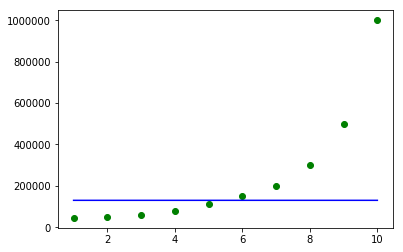

In [47]:
plt.scatter(X, y, color="green")
plt.plot(X, regressor.predict(X), color = "blue")

Uh oh! There's an issue...

### We didn't scale our features!

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale
y_scaler = StandardScaler()
y_scale = y_scaler.fit_transform(y.reshape(-1, 1))
y_scale

/Users/shelbymcgarrah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/shelbymcgarrah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/shelbymcgarrah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/shelbymcgarrah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [53]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X_scale, y_scale)

/Users/shelbymcgarrah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
target_input = [[6.5]]
scaled_input = scaler.transform(target_input)
prediction = regressor.predict(scaled_input)
display("Prediction (unscaled...)")
display(prediction)
prediction_transformed = y_scaler.inverse_transform(prediction)
display("Prediction scaled back")
display(prediction_transformed)

'Prediction (unscaled...)'

array([-0.27861589])

'Prediction scaled back'

array([170370.0204065])

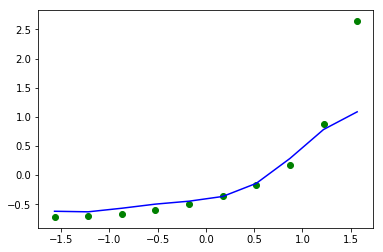

In [59]:
plt.scatter(X_scale, y_scale, color="green")
plt.plot(X_scale, regressor.predict(X_scale), color = "blue")

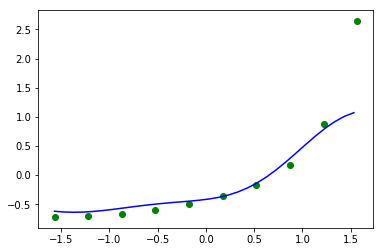

In [67]:
X_grid = np.arange(min(X_scale), max(X_scale), .1)
X_grid = X_grid.reshape((-1, 1))
plt.scatter(X_scale, y_scale, color="green")
plt.plot(X_grid, regressor.predict(X_grid), color = "blue")